In [1]:
from sklearn.linear_model import LinearRegression

In [10]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools

###sklearn.preprocessing
from statsmodels.tools.eval_measures import rmse

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [3]:
location = r"C:\Users\shubh\symbiosis ml16\datasets\Advertising.csv"
location

'C:\\Users\\shubh\\symbiosis ml16\\datasets\\Advertising.csv'

In [4]:
#import numpy, pandas,
# load the training data from glass data set
df_training = pd.read_csv(location)
df_training.head()

,Month,TV,radio,newspaper,sales
0,Jan-00,230.1,37.8,69.2,22.1
1,Feb-00,44.5,39.3,45.1,10.4
2,Mar-00,17.2,45.9,69.3,9.3
3,Apr-00,151.5,41.3,58.5,18.5
4,May-00,180.8,10.8,58.4,12.9


In [4]:
type(df_training)

pandas.core.frame.DataFrame

In [5]:
df_training.dtypes

Month         object
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      200 non-null    object 
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df_training.tail()

,Month,TV,radio,newspaper,sales
195,16-Apr,38.2,3.7,13.8,7.6
196,16-May,94.2,4.9,8.1,9.7
197,16-Jun,177.0,9.3,6.4,12.8
198,16-Jul,283.6,42.0,66.2,25.5
199,16-Aug,232.1,8.6,8.7,13.4


In [8]:
df_training.columns

Index(['Month', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [13]:
df_training.describe(include='O')

,Month
count,200
unique,200
top,12-Aug
freq,1


In [5]:
df_training.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


50% of the total investment in less than $150

average amount invested for advertising in the TV is 147. Data shows deviation of 85st

maximum amount invested in TV advertisement is 296.

Total 200 transactions is done for TV advertizement

In [6]:
# check the shape of the DataFrame (rows, columns)
df_training.shape

(200, 5)

In [13]:
# What are the features?

# TV: advertising dollars spent on TV for a single product in a given market 
#    (in thousands of dollars)
# Radio: advertising dollars spent on Radio
# Newspaper: advertising dollars spent on Newspaper

# What is the response?

# Sales: sales of a single product in a given market (in thousands of items)

# What else do we know?

# Because the response variable is continuous, this is a regression problem.
# There are 200 observations (represented by the rows), and each observation is a single market.

In [7]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

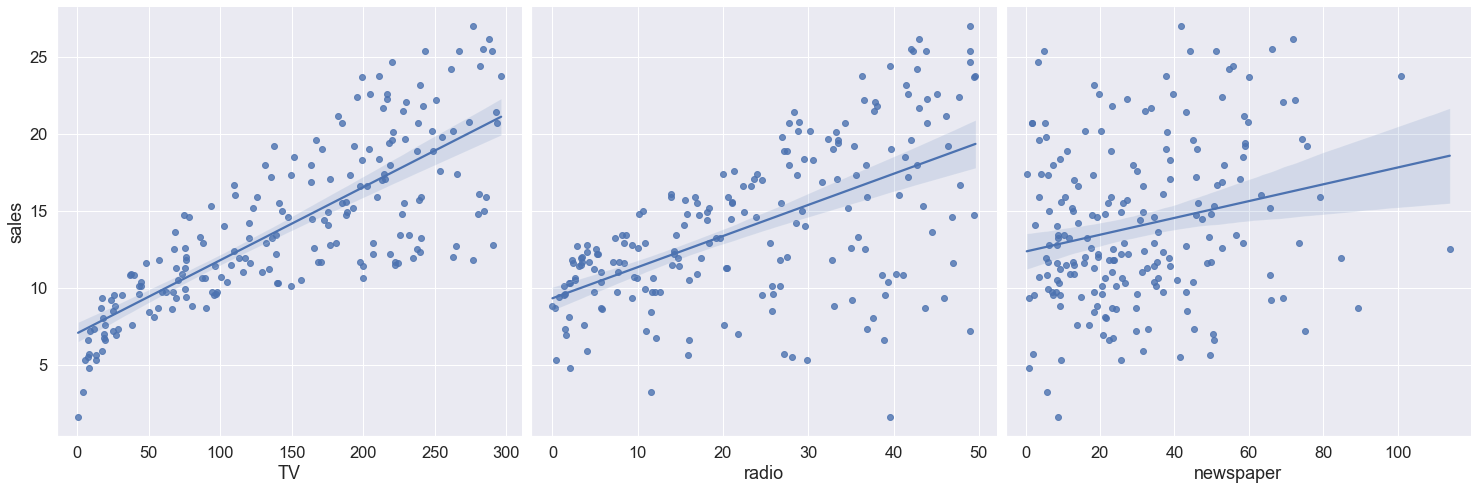

In [8]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_training,
             x_vars=['TV','radio','newspaper'], 
             y_vars='sales', 
             height=7, 
             aspect=1,
            kind ='reg')
#plt.show()

In [16]:
# Linear regression
# Pros: fast, no tuning required, highly interpretable, well-understood

# Cons: unlikely to produce the best predictive accuracy (presumes a linear relationship 
#                                                         between the features and response)

In [11]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']
#print(type(feature_cols))
# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]


# select a Series from the DataFrame
y = df_training['sales']
type(y)

pandas.core.series.Series

In [14]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [13]:
# The diagonal of the above matirx shows the auto-correlation of the variables. 
# It is always 1. 

# observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and 
# then betweeb sales and radio i.e. 0.576.

# correlations can vary from -1 to +1. 
# Closer to +1 means strong positive correlation and close -1 means strong negative correlation. 
# Closer to 0 means not very strongly correlated. 

##  -0.2 to 0.3 no corr
##  -0.3 to -0.6  moderate
##  -1  to -0.7  highly
##  +0.3 to +0.6  moderate
##  +1  to +0.7  highly

# variables with strong correlations are mostly probably candidates for model builing.**
df_training.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [18]:
df_training.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [97]:
cor_df = df_training.corr()

In [98]:
cor_df

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [20]:
cor_df[cor_df >0.5]

NameError: name 'cor_df' is not defined

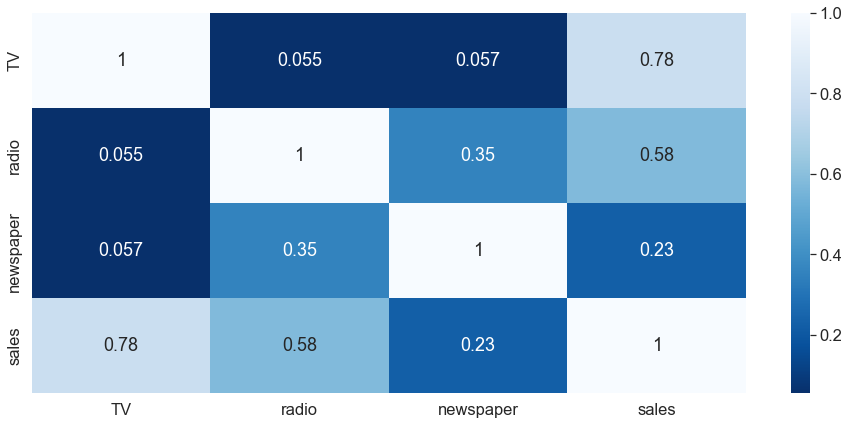

In [23]:
#sns.heatmap(  df_training.corr(), annot = False ,cbar = False, cmap='Blues_r' )
plt.figure(figsize=(16,7))
sns.heatmap(  df_training.corr(), annot = True , cmap='Blues_r' )
plt.show()

<AxesSubplot:>

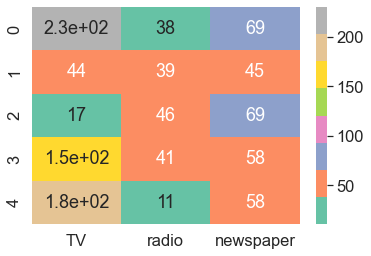

In [25]:
sns.heatmap(df_training[feature_cols].head(),annot=True, cmap="Set2" )

In [26]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.2)

In [32]:
[X_train],[X_test]

([        TV  radio  newspaper
  108   13.1    0.4       25.6
  107   90.4    0.3       23.2
  189   18.7   12.1       23.4
  14   204.1   32.9       46.0
  56     7.3   28.1       41.4
  ..     ...    ...        ...
  133  219.8   33.5       45.1
  137  273.7   28.9       59.7
  72    26.8   33.0       19.3
  140   73.4   17.0       12.9
  37    74.7   49.4       45.7
  
  [160 rows x 3 columns]],
 [        TV  radio  newspaper
  58   210.8   49.6       37.7
  40   202.5   22.3       31.6
  34    95.7    1.4        7.4
  102  280.2   10.1       21.4
  184  253.8   21.3       30.0
  198  283.6   42.0       66.2
  95   163.3   31.6       52.9
  4    180.8   10.8       58.4
  29    70.6   16.0       40.8
  168  215.4   23.6       57.6
  171  164.5   20.9       47.4
  18    69.2   20.5       18.3
  11   214.7   24.0        4.0
  89   109.8   47.8       51.4
  110  225.8    8.2       56.5
  118  125.7   36.9       79.2
  159  131.7   18.4       34.6
  35   290.7    4.1        8.5
  136   2

In [63]:
X_test.shape
#X_test

(40, 3)

In [20]:
#a, B,C,D = train_test_split(X, y, random_state=1,  test_size=0.3)

In [34]:
type(X_train.size)

numpy.int32

In [35]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [42]:
from sklearn.linear_model import LinearRegression
# instantiate
linreg = LinearRegression()
#LinearRegression().fit(X_train, y_train)
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)
#another way to do
# fit the model to the training data (learn the coefficients)


LinearRegression()

In [57]:
linreg.coef_

array([0.0468431 , 0.17854434, 0.00258619])

In [43]:
import statsmodels.api as smdl
linreg_sm = smdl.OLS(y_train, X_train).fit()

In [50]:
linreg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2584.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):                   2.35e-133
Time:                        19:21:38   Log-Likelihood:                         -344.86
No. Observations:                 160   AIC:                                      695.7
Df Residuals:                     157   BIC:                                      704.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0547      0.002     35.312      0.000       0.052       0.058
radio          0.2107      0.011     18.931      0.000       0.189       0.233
newspaper      0.0219      0.008      2.655      0.009       0.006       0.038
==============================================================================
Omnibus:                        4.397   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.013
Skew:                          -0.301   Prob(JB):                        0.134
Kurtosis:                       3.490   Cond. No.                         12.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
linreg_sm.cov_params()
# se is the sq root of digonal matrix 

,TV,radio,newspaper
TV,0.000002,-0.000006,-0.000004
radio,-0.000006,0.000124,-0.000056
newspaper,-0.000004,-0.000056,0.000068


In [40]:
linreg.coef_

array([0.0468431 , 0.17854434, 0.00258619])

In [25]:
linreg.intercept_

2.9079470208164313

In [26]:
140, 40, 30

(140, 40, 30)

#y= b0 + b1x1 + b2x2 + b3x3
#y = linreg.intercept_ + linreg.coef_[0]* df["col_name"] + linreg.coef_[1]*df['col2_name'] + linreg[2]*df["col3_name"]

## Matrix
## Metrics: errors

In [79]:
# Making predictions
# make predictions on the testing set
x_pred = linreg.predict(X_test)
# predict using sm
#y_pred_sm = linreg.predict(X_test)
#error : y_pred_sm = smdl.predict  

In [77]:
X_test

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0
198,283.6,42.0,66.2
95,163.3,31.6,52.9
4,180.8,10.8,58.4
29,70.6,16.0,40.8
168,215.4,23.6,57.6


In [103]:
import pandas as pd

pd.DataFrame[x_pred]

TypeError: 'type' object is not subscriptable

In [35]:
linreg.coef_

array([0.04697554, 0.17765046])

In [36]:
feature_cols

['TV', 'radio']

In [37]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04697554407207219), ('radio', 0.17765045939419838)]

In [38]:
linreg.intercept_

2.9647671191401574

In [39]:
sum(abs(y_test - y_pred))/60

1.0476386791868162

In [40]:
# coefficients from sm
# linreg_sm.params

In [41]:
# y = 2.93 + 0.0466 * TV + 0.176 * Radio + 0.0018 * Newspaper

# 0.0466 * TV - per unit increase in TV spend will lead to 4.66% increase in sales
# 0.179 * Radio -                                          17.9% 
# 0.00345 * Newspaper - ...............                    0.3 % ....

In [42]:
# summary report from sm
# linreg_sm.summary()

In [43]:
#x => y - y_pred
#positive
#negative

In [81]:
# Model evaluation metrics for regression
from sklearn import metrics
print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

y-intercept             :  2.9079470208164313
beta coefficients       :  [0.0468431  0.17854434 0.00258619]
Mean Abs Error   MAE    :  1.0402154012924718
Mean Sq  Error MSE      :  1.9918855518287901
Root Mean Sq Error RMSE :  1.4113417558581587
r2 value                :  0.8927605914615384


In [33]:
# R-squared is a statistical measure of how close the data are to the fitted regression line.
# R-square signifies percentage of variations in the reponse variable that can be explained 
# by the model.
# R-squared = Explained variation / Total variation

# Total variation is variation of response variable around it's mean.
# R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the 
# variability, while 100% signifies that the model explains all the variability of the response. 
# The closer the r-square to 100%, the better is the model.

In [34]:
# How do we interpret the TV coefficient (0.0466)?

# For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending 
# is associated with a 0.0466 "unit" increase in Sales.

# Important notes:

# This is a statement of association, not causation.

# If an increase in TV ad spending was associated with a decrease in sales, 
# beta_1 would be negative.

In [35]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [36]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

# calculate MAE by hand
print((10 + 0 + 20 + 10)/4)

# calculate MAE using scikit-learn
print(metrics.mean_absolute_error(true, pred))
print(metrics.mean_absolute_error(y_test, y_pred))

10.0
10.0
1.054832840507332


In [37]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

150.0
1.9289249074665737


In [38]:
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

12.24744871391589
1.3888574107756972


In [87]:
y_test.describe


<bound method NDFrame.describe of 58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
Name: sales, dtype: float64>

In [39]:
# Computing the RMSE for our Sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3888574107756972


In [40]:
# Feature selection
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04695204776848464),
 ('radio', 0.17658643526817366),
 ('newspaper', 0.001851153318892224)]

In [41]:
# what does the coeff for newspaper say?

# For a given amount of Radio and TV adv spending, a "unit" increase in newspaper adv spending 
# is associated with a 0.0018 "unit" increase in Sales.

# can we remove the feature called 'newspaper'?

In [53]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]

# select a Series from the DataFrame
y = df_training.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print(metrics.r2_score(y_test, y_pred))

1.3879034699382888
0.9176214942248908


In [43]:
# The RMSE decreased when we removed Newspaper from the model. 
# (Error is something we want to minimize, so a lower number for RMSE is better.) 
# Thus, it is unlikely that this feature is useful for predicting Sales, 
# and should be removed from the model.

In [44]:
# calculate r2 score

y_true_ex = [3, -0.5, 2, 7]
y_pred_ex = [2.5, 0.0, 2, 8]
print(metrics.r2_score(y_true_ex, y_pred_ex))

0.9486081370449679


In [45]:
# calculate r2-score for our sales example
print(metrics.r2_score(y_test, y_pred))

0.9176214942248908


In [1]:
abc=(1,2,3)
type(abc)

In [2]:
list(abc)

[1, 2, 3]

In [3]:
list1=[11,22,13]

In [4]:
list1

[11, 22, 13]

In [5]:
a=("a","b","c")

In [6]:
list(a)

['a', 'b', 'c']

In [46]:
list

[11, 22, 13]

In [89]:
import statsmodels.formula.api as smf

sm_model = smf.ols(formula = 'sales ~

In [94]:
sm_model = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = df_training).fit() 
sm_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        20:32:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
sm_model2 = smf.ols(formula  = 'sales ~ TV + radio', data = df_training ).fit()

In [96]:
print("newspaper:", sm_model.rsquared ,sm_model2.rsquared_adj)

newspaper: 0.8972106381789522 0.8961505479974428


In [47]:
df = pd.read_csv(r"C:\Users\shubh\symbiosis ml16\datasets\glass.csv")

In [48]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [49]:
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [56]:
df.dtypes

Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [54]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [57]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

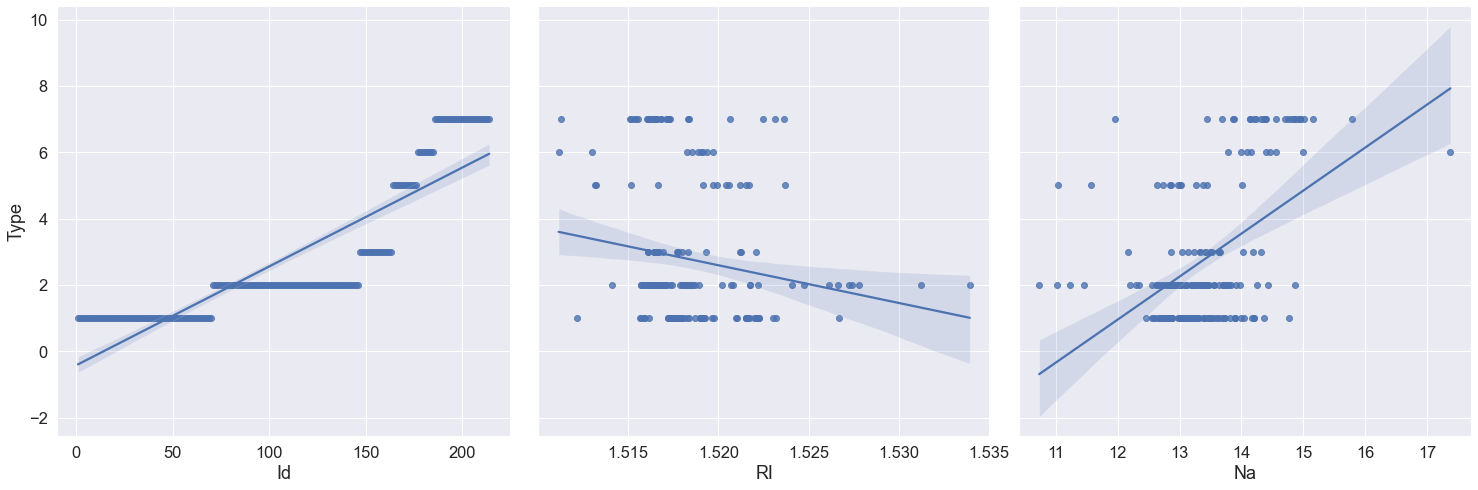

In [60]:
df# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df,
             x_vars=['Id', 'RI','Na'], 
             y_vars='Type', 
             height=7, 
             aspect=1,
            kind ='reg')
#plt.show()

In [62]:
df.tail()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [64]:
feature_cols = ['Id', 'RI', 'Na']
X = df[feature_cols]
y = df['Type']
type(y)

pandas.core.series.Series

In [66]:
X

,Id,RI,Na
0,1,1.52101,13.64
1,2,1.51761,13.89
2,3,1.51618,13.53
3,4,1.51766,13.21
4,5,1.51742,13.27
...,...,...,...
209,210,1.51623,14.14
210,211,1.51685,14.92
211,212,1.52065,14.36
212,213,1.51651,14.38


In [68]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [70]:
df_corr= df.corr()

In [71]:
df_corr

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


In [72]:
y_pred = linreg.predict(X_test)

In [104]:
import pandas as pd
pd.DataFrame(y_pred)

,0
0,21.735772
1,16.456938
2,7.659932
3,17.892027
4,18.677307
5,23.862719
6,16.336236
7,13.456492
8,9.177296
9,17.360562


In [1]:
import statsmodels.stats.api as sms

In [3]:
name = ['statistics ', 'p_value','f_value' , 'f p_value']
test = sms.het_breuschpagan(model.resid, model.exog)

NameError: name 'model' is not defined

# levene test


In [14]:
insurance=pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/insurance.csv")

In [15]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
from scipy.stats as stats

sex_var_result = stats.levene(df['charges'][df['sex']==0],df['charges'][df['sex']==1],
                             center='median')
smoker_var_result = stats.levene(df['charges'][df['smoker']==0],df['charges'][df['sex']==1],
                             center='median')
region_var_result = stats.levene(df['charges'][df['region_south']==1],df['charges'][df['region_west']==1],
                             center='median')
print(f"sex var : {sex_var_result}","\n", f"smoker : {smoker_var_result}","\n" , f"region : {region_var_result}","\n")



SyntaxError: invalid syntax (Temp/ipykernel_7284/2950701904.py, line 1)